In [2]:
#b0829044_葉丙俊
#神經網絡入門：分類和回歸
#電影評論分類：二元分類示例
#IMDB 數據集
#加載 IMDB 數據集
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
#將評論解碼回文本
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [7]:
#準備數據
#通過多熱編碼對整數序列進行編碼
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [10]:
#Building your model
#設定model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [11]:
#Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [12]:
#Validating your approach
#Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
#訓練model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5226 - accuracy: 0.7979 - val_loss: 0.4153 - val_accuracy: 0.8473
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3198 - accuracy: 0.8971 - val_loss: 0.3089 - val_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2333 - accuracy: 0.9225 - val_loss: 0.2887 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1840 - accuracy: 0.9397 - val_loss: 0.3206 - val_accuracy: 0.8695
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1525 - accuracy: 0.9507 - val_loss: 0.2784 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1272 - accuracy: 0.9587 - val_loss: 0.2854 - val_accuracy: 0.8886
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1044 - accuracy: 0.9686 - val_loss: 0.3016 - val_accuracy: 0.8866
Epoch 8/20
30

In [14]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

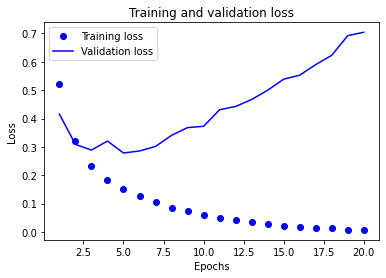

In [15]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

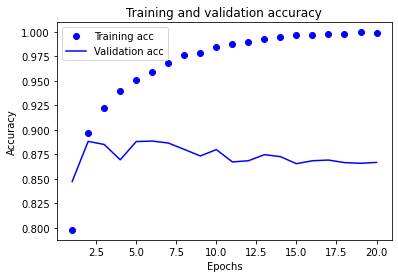

In [16]:
#Plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
#Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4726 - accuracy: 0.8168
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2633 - accuracy: 0.9079
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2017 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3116 - accuracy: 0.8781


In [18]:
results

[0.31158575415611267, 0.8781200051307678]

In [19]:
#Using a trained model to generate predictions on new data
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.21056408],
       [0.9999235 ],
       [0.9465174 ],
       ...,
       [0.19374673],
       [0.12523712],
       [0.7504508 ]], dtype=float32)

In [20]:
#進一步的實驗
#包起來
#分類新聞專線：一個多類分類示例
#路透社數據集
#加載路透社數據集
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [21]:
len(train_data)

8982

In [22]:
len(test_data)

2246

In [23]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [24]:
#Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [25]:
train_labels[10]

3

In [26]:
#Preparing the data
#Encoding the input data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
#Encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [28]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [29]:
#Building your model
#Model definition
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [30]:
#Compiling the model
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [31]:
#Validating your approach
#Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [32]:
#Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 25ms/step - loss: 2.7942 - accuracy: 0.4979 - val_loss: 1.8402 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4812 - accuracy: 0.7056 - val_loss: 1.3404 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0992 - accuracy: 0.7657 - val_loss: 1.1662 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8711 - accuracy: 0.8145 - val_loss: 1.0692 - val_accuracy: 0.7690
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6981 - accuracy: 0.8518 - val_loss: 1.0028 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5655 - accuracy: 0.8830 - val_loss: 0.9390 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4543 - accuracy: 0.9050 - val_loss: 0.9799 - val_accuracy: 0.7890
Epoch 8/20
16

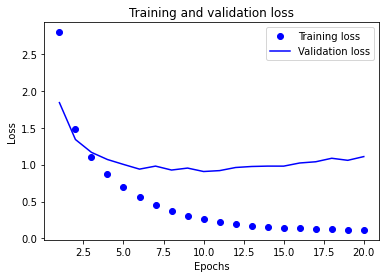

In [33]:
#Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

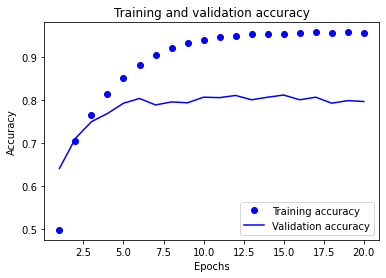

In [34]:
#Plotting the training and validation accuracy
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [35]:
#Retraining a model from scratch
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.5001 - accuracy: 0.5321
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.3288 - accuracy: 0.7220
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 0.9888 - accuracy: 0.7915
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7651 - accuracy: 0.8383
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6020 - accuracy: 0.8746
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4805 - accuracy: 0.9001
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3869 - accuracy: 0.9192
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3159 - accuracy: 0.9318
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9504 - accuracy: 0.7916


In [36]:
results

[0.9503962993621826, 0.7916295528411865]

In [37]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18121104185218165

In [38]:
#Generating predictions on new data
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 2ms/step


(46,)

In [39]:
np.sum(predictions[0])

1.0

In [40]:
np.argmax(predictions[0])

3

In [41]:
#A different way to handle the labels and the loss

y_train = np.array(train_labels)
y_test = np.array(test_labels)
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [42]:
#The importance of having sufficiently large intermediate layers
#A model with an information bottleneck
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.6924 - accuracy: 0.4671 - val_loss: 1.8921 - val_accuracy: 0.5810
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 1.5980 - accuracy: 0.5990 - val_loss: 1.5094 - val_accuracy: 0.6070
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2940 - accuracy: 0.6409 - val_loss: 1.3779 - val_accuracy: 0.6630
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1267 - accuracy: 0.6911 - val_loss: 1.3450 - val_accuracy: 0.6570
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0102 - accuracy: 0.7253 - val_loss: 1.2938 - val_accuracy: 0.6820
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9179 - accuracy: 0.7622 - val_loss: 1.2776 - val_accuracy: 0.6990
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8387 - accuracy: 0.7825 - val_loss: 1.3028 - val_accuracy: 0.7070
Epoch 8/20
63/63 [=

In [43]:
#進一步的實驗
#包起來
#預測房價：回歸示例
#波士頓房價數據集
#加載波士頓住房數據集
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [44]:
train_data.shape

(404, 13)

In [45]:
test_data.shape

(102, 13)

In [46]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [47]:
#Preparing the data
#Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [48]:
#Building your model
#Model definition
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [49]:
#Validating your approach using K-fold validation
#K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [50]:
all_scores

[2.0069117546081543, 2.531155824661255, 2.488290786743164, 2.5153071880340576]

In [51]:
np.mean(all_scores)

2.3854163885116577

In [52]:
#Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [53]:
#Building the history of successive mean K-fold validation scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

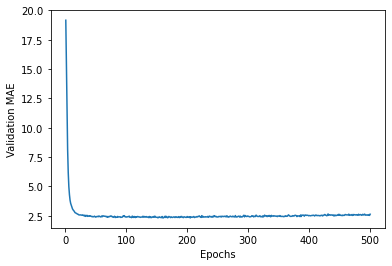

In [54]:
#Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

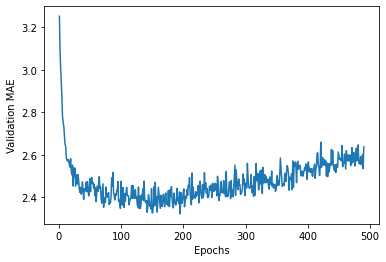

In [55]:
#Plotting validation scores, excluding the first 10 data points
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [56]:
#Training the final model
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 17.7234 - mae: 2.6874


In [57]:
test_mae_score

2.687432050704956

In [58]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 1ms/step


array([8.002621], dtype=float32)